In [2]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3  # noqa: F401
import numpy as np
from sklearn.datasets import make_s_curve

import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

In [4]:
nr_samples = 15000

rng = np.random.default_rng(1)

# reduce number of points for plotting
nr_samples_plot = 1000
idx_plot = rng.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_s_curve(nr_samples, random_state=3, noise=0)

In [9]:
X.shape

(15000, 3)

In [5]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.0017246666403009092, cut-off=0.17824010090529005


In [6]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(
        epsilon=X_pcm.kernel.epsilon, distance=dict(cut_off=X_pcm.cut_off)
    ),
    n_eigenpairs=9,
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

In [7]:
evals

array([1.        , 0.99991746, 0.99966445, 0.99925247, 0.99866844,
       0.99822806, 0.99814375, 0.99793268, 0.99790531])

(<Figure size 1500x1500 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{0}$'}>,
         <AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{2}$'}>],
        [<AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{3}$'}>,
         <AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{4}$'}>],
        [<AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{5}$'}>,
         <AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{6}$'}>],
        [<AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{7}$'}>,
         <AxesSubplot:title={'center':'$\\Psi_{1}$ vs. $\\Psi_{8}$'}>]],
       dtype=object))

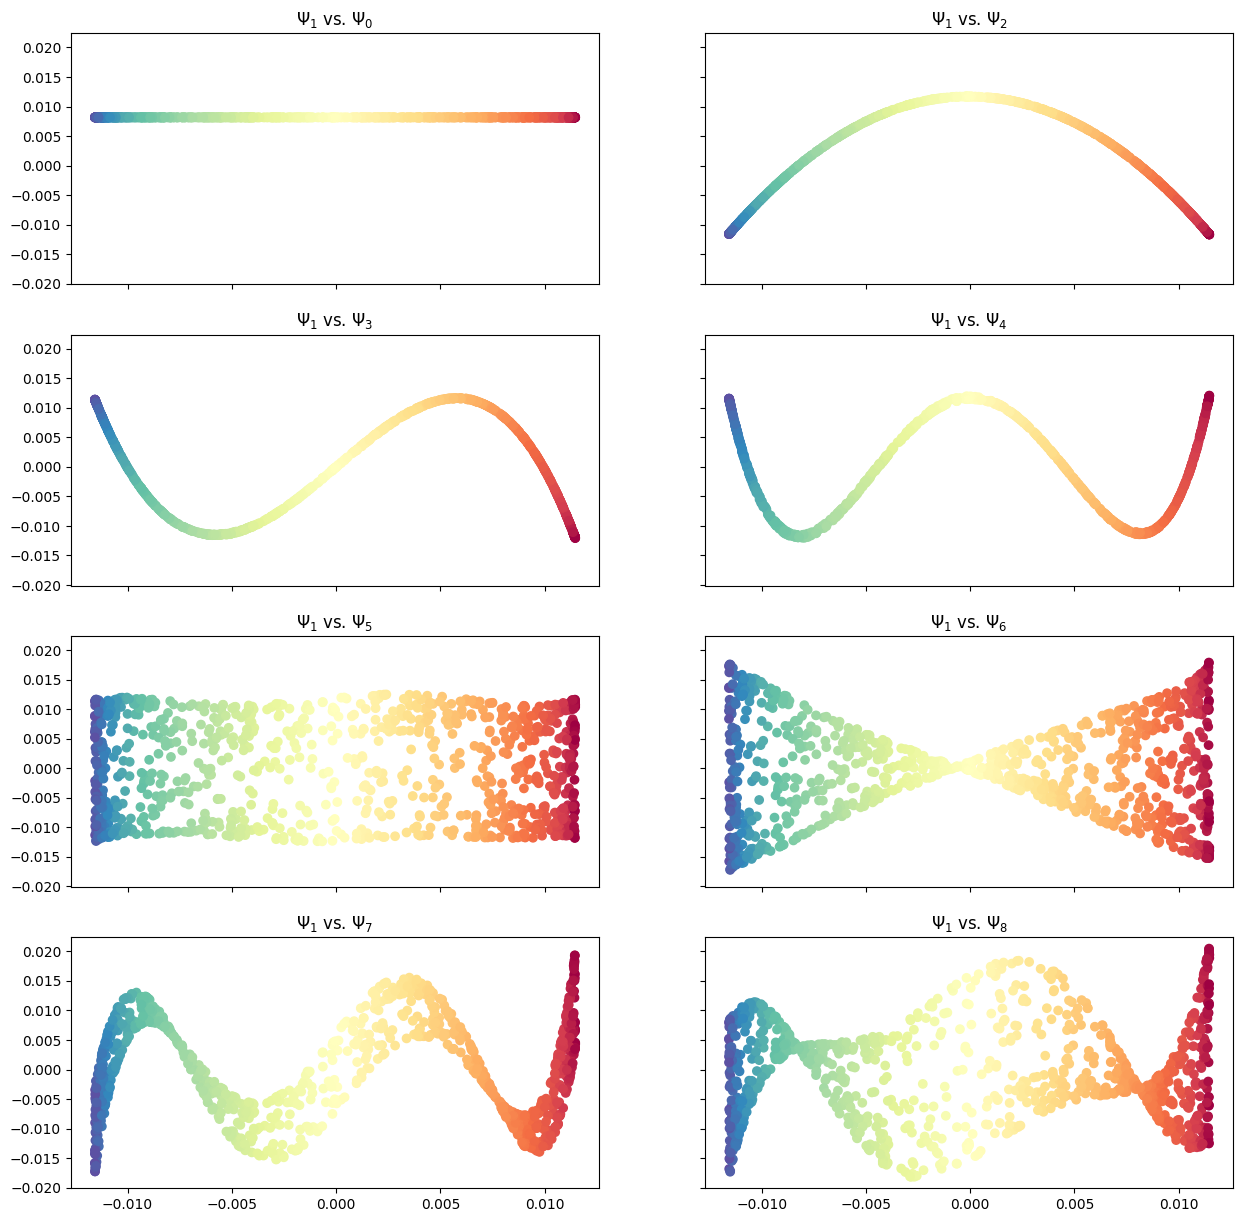

In [8]:
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),)